# Task2 Of Mini Project 1
## AmirHossein Hadinezhad, Andrei Serban, Gabriel Alejandro Martinica Ardon

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import statistics
from numpy import mean
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

### Loading the data (part2)

In [67]:
dataset = pd.read_csv("drug200.csv")
#debug lines
# print(np.count_nonzero(dataset==np.nan))
# print(dataset.head())

### Distribution Graph (Part3)

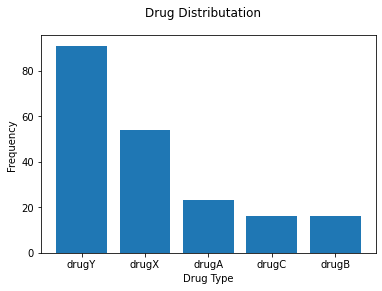

In [68]:

distributation = dataset.Drug.value_counts()

# dataset[-1].plot(kind='hist');
y = distributation.values
x = distributation.index
plt.plot()
plt.ylabel('Frequency')
plt.xlabel('Drug Type')
plt.bar(x, y)
plt.suptitle("Drug Distributation")
plt.savefig("Drug Distributation.pdf", format="pdf")
plt.show()

### Convering the data  (Part4)

In [69]:
dataset.BP = pd.Categorical(dataset.BP, ["LOW", "NORMAL", "HIGH"], ordered=True)

dataset.Cholesterol = pd.Categorical(dataset.Cholesterol, ["LOW", "NORMAL", "HIGH"], ordered=True)

dataset.BP = dataset.BP.cat.codes
dataset.Cholesterol = dataset.Cholesterol.cat.codes


features = dataset.iloc[:, :-1]
targets = dataset.iloc[:, -1]

features = pd.get_dummies(features, columns=['Sex'], prefix="Gender", prefix_sep=": ")
# targets = pd.get_dummies(targets, columns=['Drug'], prefix="Drug type", prefix_sep=": ")
# debug lines
# print(dataset.head())
# print(features)
# print(targets)

### Split dataset for training and test (part5)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(features.values, targets.values)

 ### Train using Gaussian Naive Bayes Classifie (part6a)

In [71]:
f = open("drugs-performance.txt", "a")
f.write("\n Running Gaussian Naive Bayes Classifier\n")
f.close()
gaussian_naive_bayes_training = GaussianNB()
gaussian_naive_bayes_training.fit(X_train, y_train)
dict = gaussian_naive_bayes_training.get_params()

 ### Train using  Decision Tree (part6b)

In [72]:
f = open("drugs-performance.txt", "a")
f.write("\n Decision Tree\n")
f.close()
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [73]:
f = open("drugs-performance.txt", "a")
f.write("\n Running Top-DT\n")
top_DT_parameters = {'criterion': ['entropy', 'gini'],
                     'max_depth': (2, 4), 
                     'min_samples_split': (2, 3, 7)}

clf_topdt = GridSearchCV(clf, top_DT_parameters)

clf_topdt.fit(X_train, y_train)

pred_result_gridsearch = clf_topdt.predict(X_test)

In [74]:
f = open("drugs-performance.txt", "a")
f.write("\n Running PER\n")
f.close()

clf_perceptron = Perceptron()
clf_perceptron.fit(X_train, y_train)
pred_result_perceptron = clf_perceptron.predict(X_test)

In [75]:
f = open("drugs-performance.txt", "a")
f.write("\n Base-MLP\n")
f.close()


clf_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
clf_mlp.fit(X_train, y_train)
pred_result_mlp = clf_mlp.predict(X_test)

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
f = open("drugs-performance.txt", "a")
f.write("\n Top-MLP\n")
f.close()

top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

clf_top_mlp = GridSearchCV(clf_mlp, top_MLP_parameters)
clf_top_mlp.fit(X_train, y_train)
pred_result_top_mlp = clf_top_mlp.predict(X_test)

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Part 7

### Gaussian Naive Bayes Classifier a)

In [77]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tGaussian Naive Bayes Classifier\n")
f.write("Default Hyper-Params Used\n\n")
f.close()

In [78]:
gaussian_naive_bayes_training = GaussianNB()
gaussian_naive_bayes_training.fit(X_train, y_train)

GaussianNB()

#### the confusion matrix b)

In [79]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = gaussian_naive_bayes_training.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class c)

In [80]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

#### the accuracy, macro-average F1 and weighted-average F1 of the model d)

In [81]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Decision Tree

In [82]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tDecision Tree\n")
f.write("Default Hyper-Params Used\n\n")
f.close()

In [83]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

#### the confusion matrix b)

In [84]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class c)

In [85]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model d)

In [86]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Top - Decision Tree

In [87]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tTop Decision Tree\n")
f.close()

In [88]:
top_DT_parameters = {'criterion': ['entropy', 'gini'],
                     'max_depth': (2, 4), 
                     'min_samples_split': (2, 3, 7)}

clf_topdt = GridSearchCV(clf, top_DT_parameters)

clf_topdt.fit(X_train, y_train)

pred_result_gridsearch = clf_topdt.predict(X_test)

dict = clf_topdt.get_params()
f = open("drugs-performance.txt", "a")
f.write("\nHyper-Parameters:\n")
f.write("Criterion: Entropy and gini\n")
f.write("Max_depth: (2,4)\n")
f.write("Min_samples_split: (2, 3, 7)\n")
f.write("\nBest Hyper-Parameters Found:\n")
f.write("Max_depth: " + (str)(dict['estimator__criterion']))
f.write("\n")
f.write("Max_depth:" + (str)(dict['estimator__max_depth']))
f.write("\n")
f.write("Min_samples_split" + (str)(dict['estimator__min_samples_split']))
f.write("\n")
f.close()

#### the confusion matrix b)

In [89]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_topdt.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class c)

In [90]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model d)

In [91]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Perceptron

In [92]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tPerceptron\n")
f.write("Default Hyper-Params Used\n\n")
f.close()

In [93]:
clf_perceptron = Perceptron()
clf_perceptron.fit(X_train, y_train)

Perceptron()

#### the confusion matrix b)

In [94]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_perceptron.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class c)

In [95]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model d)

In [96]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Multi-Layered Perceptron

In [97]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tMulti-Layered Perceptron\n")
f.write("Default Hyper-Params Used\n\n")
f.close()

In [98]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
clf_mlp.fit(X_train, y_train)

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=100, solver='sgd')

#### the confusion matrix b)

In [99]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_mlp.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class c)

In [100]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### the accuracy, macro-average F1 and weighted-average F1 of the model d)

In [101]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

### Top-Multi-Layered Perceptron

In [102]:
f = open("drugs-performance.txt", "a")
f.write("\n\n\n\n\t**********************************\n")
f.write("\n\tTop-Multi-Layered Perceptron\n\n\n")
f.close()

In [103]:
top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

clf_top_mlp = GridSearchCV(clf_mlp, top_MLP_parameters)
clf_top_mlp.fit(X_train, y_train)

dict = clf_top_mlp.get_params()
print(dict)

dict = clf_top_mlp.get_params()
f = open("drugs-performance.txt", "a")
f.write("\nHyper-Parameters:\n")
f.write("Activation: logistic, tanh, relu, identity\n")
f.write("Hidden_layer_sizes: ((30, 50), (10, 10, 10)\n")
f.write("Solver: (adam, sgd)\n")
f.write("\nBest Hyper-Parameters Found:\n")
f.write("Activation: " + (str)(dict['estimator__activation']))
f.write("\n")
f.write("Hidden_layer_sizes: " + (str)(dict['estimator__hidden_layer_sizes']))
f.write("\n")
f.write("Solver: " + (str)(dict['estimator__solver']))
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'cv': None, 'error_score': nan, 'estimator__activation': 'logistic', 'estimator__alpha': 0.0001, 'estimator__batch_size': 'auto', 'estimator__beta_1': 0.9, 'estimator__beta_2': 0.999, 'estimator__early_stopping': False, 'estimator__epsilon': 1e-08, 'estimator__hidden_layer_sizes': 100, 'estimator__learning_rate': 'constant', 'estimator__learning_rate_init': 0.001, 'estimator__max_fun': 15000, 'estimator__max_iter': 200, 'estimator__momentum': 0.9, 'estimator__n_iter_no_change': 10, 'estimator__nesterovs_momentum': True, 'estimator__power_t': 0.5, 'estimator__random_state': None, 'estimator__shuffle': True, 'estimator__solver': 'sgd', 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': False, 'estimator__warm_start': False, 'estimator': MLPClassifier(activation='logistic', hidden_layer_sizes=100, solver='sgd'), 'n_jobs': None, 'param_grid': {'activation': ('logistic', 'tanh', 'relu', 'identity'), 'hidden_layer_sizes': ((30, 50), (10, 10, 10)), 'solver

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### the confusion matrix b)

In [104]:
f = open("drugs-performance.txt", "a")
f.write("\nConfusion Matrix: \n")
y_predicted = clf_top_mlp.predict(X_test)
f.write(repr(confusion_matrix(y_test, y_predicted)))
f.close()

#### The precision, recall, and F1-measure for each class c)

In [105]:
f = open("drugs-performance.txt", "a")
f.write("\nThe precision, recall, and F1-measure\n")
f.write((classification_report(y_test, y_predicted,target_names=["DrugA","DrugB","DrugC","DrugX","DrugY"])))
f.write("\n")
f.close()

#### the accuracy, macro-average F1 and weighted-average F1 of the model d)

In [106]:
f = open("drugs-performance.txt", "a")
f.write("\nAccuracy, macro-average F1 and weighted-average F1:\n")
f.write("Accuracy score: " + repr(accuracy_score(y_test, y_predicted)) +"\n")
f.write("Macro F1 average: " + repr(f1_score(y_test, y_predicted, average='macro'))+"\n")
f.write("Weighted F1 average: " + repr(f1_score(y_test, y_predicted, average='weighted'))+"\n")
f.write("\n")
f.close()

## Step 8

### Gaussian Naive Bayes Classifier

In [107]:
#gaussian_naive_bayes_training = GaussianNB()
#gaussian_naive_bayes_training.fit(X_train, y_train)

f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Gaussian Naive Bayes Classifier:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

for i in range(10):
    gaussian_naive_bayes_training = GaussianNB()
    gaussian_naive_bayes_training.fit(X_train, y_train)
    y_predicted = gaussian_naive_bayes_training.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)

### Decision Tree

In [108]:
# clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
# clf.fit(X_train, y_train)

f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Decision Tree:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

for i in range(10):
    clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()

### Top-Decision Tree

In [109]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Decision Tree:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

top_DT_parameters = {'criterion': ['entropy', 'gini'],
                     'max_depth': (2, 4), 
                     'min_samples_split': (2, 3, 7)}

for i in range(10):
    clf_topdt = GridSearchCV(clf, top_DT_parameters)
    clf_topdt.fit(X_train, y_train)
    y_predicted = clf_topdt.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()

### Perceptron

In [110]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Perceptron:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

for i in range(10):
    clf_perceptron = Perceptron()
    clf_perceptron.fit(X_train, y_train)
    y_predicted = clf_perceptron.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()

### Multi-Layered Perceptron

In [111]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Multi-Layered Perceptron:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

for i in range(10):
    clf_mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd')
    clf_mlp.fit(X_train, y_train)
    y_predicted = clf_mlp.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

### Top-Multi-Layered Perceptron

In [ ]:
f = open("drugs-performance.txt", "a")
f.write("\nRunning 10 - Multi-Layered Perceptron:\n")

Accuracy_list = []
Macro_F1_list = []
Weighted_F1_list = []

top_MLP_parameters = {'activation': ('logistic', 'tanh', 'relu', 'identity'),
                  'hidden_layer_sizes': ((30, 50), (10, 10, 10)),
                  'solver': ('adam', 'sgd')}

for i in range(10):
    clf_top_mlp = GridSearchCV(clf_mlp, top_MLP_parameters)
    clf_top_mlp.fit(X_train, y_train)
    y_predicted = clf_top_mlp.predict(X_test)
    Accuracy_list.append(accuracy_score(y_test, y_predicted))
    Macro_F1_list.append(f1_score(y_test, y_predicted, average='macro'))
    Weighted_F1_list.append(f1_score(y_test, y_predicted, average='weighted'))
Accuracy_avg = mean(Accuracy_list)
Macro_F1_avg = mean(Macro_F1_list)
Weighted_F1_avg = mean(Weighted_F1_list)
f.write("Average accuracy: " + repr(Accuracy_avg) + "\n")
f.write("Average macro-average F1: " + repr(Macro_F1_avg) + "\n")
f.write("Average weighted-average F1: " + repr(Weighted_F1_avg) + "\n")
f.write("Accuracy Standard Deviation: " + repr(statistics.stdev(Accuracy_list)) + "\n")
f.write("Macro-average Standard Deviation: " + repr(statistics.stdev(Macro_F1_list)) + "\n")
f.write("Weighted-average Standard Deviation: " + repr(statistics.stdev(Weighted_F1_list)) + "\n")
f.write("\n")
f.close()

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en

C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\envs\env1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\miniconda3\en